In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = data[features]
y = data[target]


In [5]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
X.isna().mean()*100

Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [7]:
# Handle missing values
X['Age'].fillna(X['Age'].mean(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

C:\Users\babam\AppData\Local\Temp\ipykernel_9912\3834349751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)
C:\Users\babam\AppData\Local\Temp\ipykernel_9912\3834349751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)


In [8]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

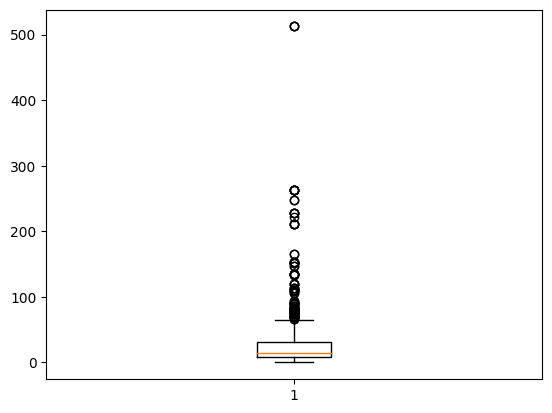

In [9]:
#outliers detection
plt.boxplot(X['Fare'])
plt.show()

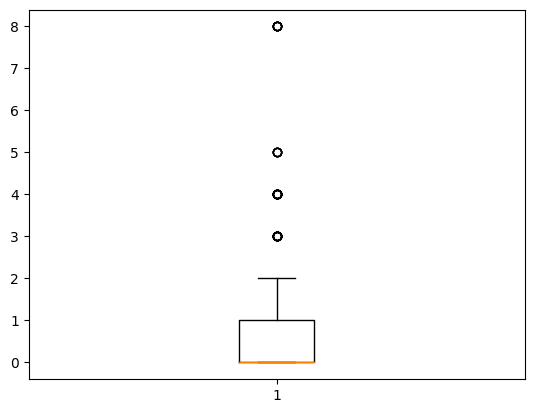

In [10]:
plt.boxplot(X['SibSp'])
plt.show()

C:\Users\babam\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


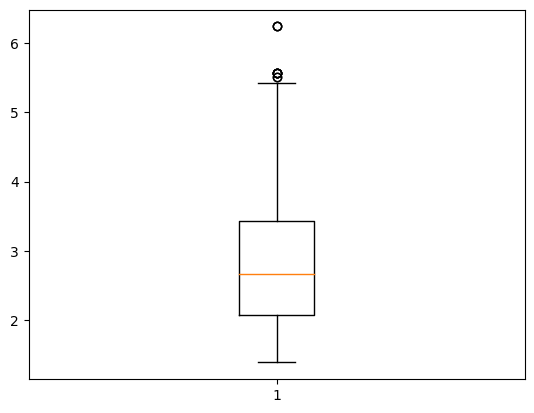

In [11]:
plt.boxplot(np.log(data['Fare']))
plt.show()

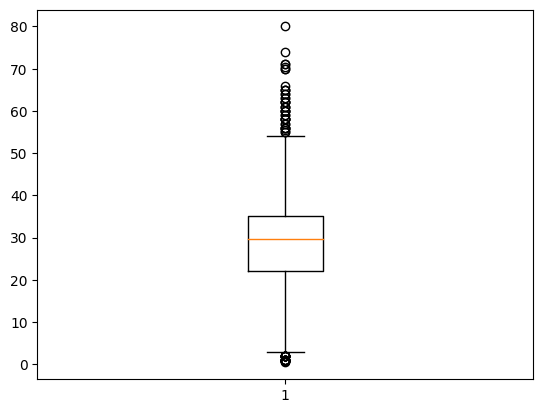

In [12]:
plt.boxplot(X['Age'])
plt.show()

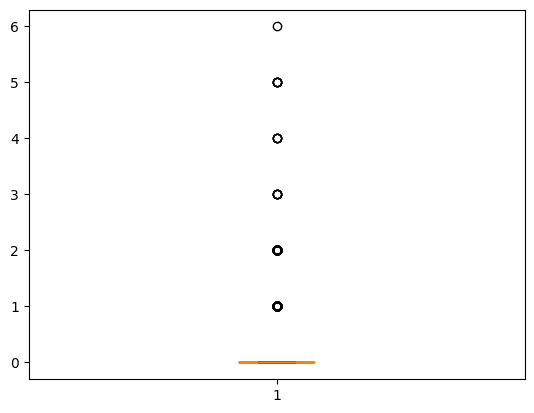

In [13]:
plt.boxplot(X['Parch'])
plt.show()

In [14]:
X['Age'].skew()

0.4344880940129925

In [15]:
from scipy.stats import zscore

In [16]:
check = ['Age','Parch','Fare','SibSp']
z_scores = np.abs(zscore(X[check]))
z_score_threshold=3
outlier_mask = np.any(z_scores>z_score_threshold,axis=1)
new_X=X[~outlier_mask]
new_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [17]:
X.shape

(891, 7)

In [18]:
new_X.shape

(820, 7)

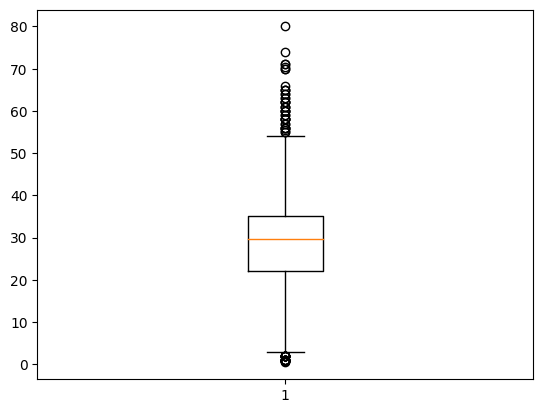

In [19]:
plt.boxplot(X['Age'])
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [21]:
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'].astype(str))

C:\Users\babam\AppData\Local\Temp\ipykernel_9912\2750445987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = label_encoder.fit_transform(X['Sex'])
C:\Users\babam\AppData\Local\Temp\ipykernel_9912\2750445987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = label_encoder.fit_transform(X['Embarked'].astype(str))


In [22]:
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

C:\Users\babam\AppData\Local\Temp\ipykernel_9912\596200898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])


In [23]:
X['FamilySize'] = X['SibSp'] + X['Parch']

C:\Users\babam\AppData\Local\Temp\ipykernel_9912\2920139348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['FamilySize'] = X['SibSp'] + X['Parch']


In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


ModuleNotFoundError: No module named 'imblearn'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Doing hyperparameter tunning and making objects

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
random_forest = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_rf = GridSearchCV(random_forest, param_grid=param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)
random_forest_best = grid_search_rf.best_estimator_

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

In [ ]:
grid_search_gb = GridSearchCV(gradient_boosting, param_grid=param_grid, cv=5)
grid_search_gb.fit(X_train, y_train)
gradient_boosting_best = grid_search_gb.best_estimator_

In [ ]:
from sklearn.pipeline import make_pipeline
svm = make_pipeline(StandardScaler(), SVC(random_state=42))

In [ ]:
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.1, 1, 10]
}

In [ ]:
grid_search_svm = GridSearchCV(svm, param_grid=param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)
svm_best = grid_search_svm.best_estimator_

In [ ]:
lr=LogisticRegression()

In [ ]:
classifiers = [
    ('Random Forest', random_forest_best),
    ('Gradient Boosting', gradient_boosting_best),
    ('Support Vector Machine', svm_best),
    ('Logistic regression',lr)
]

In [ ]:
for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classifier_name, 'Accuracy:', np.round(accuracy, 2))


Random Forest Accuracy: 0.86
Gradient Boosting Accuracy: 0.9
Support Vector Machine Accuracy: 0.83
Logistic regression Accuracy: 0.8


# Bagging start from here

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
mod1 = DecisionTreeClassifier()

In [ ]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    #plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

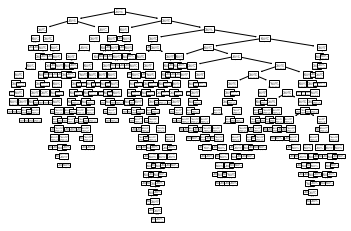

0.990909090909091


In [ ]:
evaluate(mod1,X,y)

In [ ]:
mod2 = DecisionTreeClassifier()

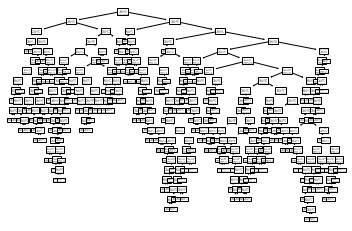

0.990909090909091


In [ ]:
evaluate(mod2,X,y)

In [ ]:
# data = data.sample(100)
# df_train=data.iloc[:60,:].sample(20)
# df_val=data.iloc[60:80,:].sample(10)
# df_test=data.iloc[80:,:].sample(10
                                
# X_test = df_val.iloc[:,0:7].values
                                
# y_test = df_val.iloc[:,-1].values

SyntaxError: invalid syntax (Temp/ipykernel_9488/457312854.py, line 6)

In [ ]:
import pickle